# Sykes Pre-Employment Analytics Project 

# Linear Regression Model to Predict Vehicle Price Based on Specifications

### Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the raw data

In [2]:
raw_data = pd.read_csv('vehicles.csv')
raw_data

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,...,1G1YU3DW1A5106980,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,...,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,...,NaN,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,...,NaN,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,...,NaN,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,7225894529,birmingham,23990,2013.0,lincoln,navigator sport utility,good,8 cylinders,gas,...,5LMJJ2J52DEL06738,4wd,NaN,SUV,white,Carvana is the safer way to buy a car During t...,al,33.520000,-86.790000,2020-11-05T11:03:32-0600
1995,1995,7225893321,birmingham,33688,2017.0,jeep,wrangler unlimited sport,excellent,6 cylinders,gas,...,NaN,4wd,mid-size,SUV,black,SUPER NICE 1 OWNER PERFECT CAR FAX 4WD WITH AU...,al,32.922900,-86.545000,2020-11-05T11:01:52-0600
1996,1996,7225892941,birmingham,39888,2016.0,chevrolet,silverado 1500 ltz 4x4,like new,8 cylinders,gas,...,NaN,4wd,full-size,pickup,red,JUST TRADED CLEAN CARFAX. CALL GARY @ 205-862...,al,32.922900,-86.545000,2020-11-05T11:01:26-0600
1997,1997,7225892326,birmingham,42888,2019.0,chevrolet,silverado 1500 lt 4x4,like new,8 cylinders,gas,...,NaN,4wd,full-size,pickup,silver,JUST TRADED CLEAN CARFAX. CALL GARY @ 205-862...,al,32.922900,-86.545000,2020-11-05T11:00:43-0600


In [3]:
# There are 1999 rows and 23 columns.
# The first potential regressor is the Manufacturer/Brand. Probably a BMW is generally more expensive than a Hyundai.
# The second would be the odometer - the higher the mileage, the cheaper the vehicle
# The third would be the year of production - the older the car, the cheaper it is. (exception of vintage vehicles)


### Preprocessing

#### Exploring the descriptive statistics of the variables 
to spot problems in the data set

In [4]:
raw_data.describe(include='all')

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
count,1999.000000,1.999000e+03,1999,1.999000e+03,1981.000000,1870,1989,1062,1270,1978,...,1204,1386,563,1288,1528,1999,1999,1988.000000,1988.000000,1999
unique,NaN,NaN,2,NaN,NaN,35,821,6,7,5,...,1049,3,4,13,12,1765,1,NaN,NaN,1976
top,NaN,NaN,birmingham,NaN,NaN,ford,wrangler,good,6 cylinders,gas,...,1N4AL3AP3HC224419,fwd,full-size,sedan,white,WE ARE GOING THROUGH A VERY UNCERTAIN TIME WIT...,al,NaN,NaN,2020-11-09T08:49:25-0600
freq,NaN,NaN,1911,NaN,NaN,391,43,618,541,1722,...,4,498,410,309,540,12,1999,NaN,NaN,3
mean,999.000000,7.233550e+09,NaN,6.338826e+05,2010.304897,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.070190,-86.740015,NaN
std,577.205914,4.088379e+06,NaN,2.761232e+07,8.876022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.368996,6.005261,NaN
min,0.000000,7.224722e+09,NaN,0.000000e+00,1911.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.241841,-122.509472,NaN
25%,499.500000,7.229896e+09,NaN,5.800000e+03,2007.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.209824,-86.858340,NaN
50%,999.000000,7.233576e+09,NaN,1.298700e+04,2012.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.520000,-86.783409,NaN
75%,1498.500000,7.236935e+09,NaN,2.399500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.205600,-86.279647,NaN


#### Determining the variables of interest

In [5]:
#remove the variables that are not very useful.
# id, region,  model(could be engineered from manufacturer, year, cylinders without losing too much variability), condition(618 freq
#title status, transmission, VIN, drive, size(very little data), type, paint_color, description, state, lat, long, posting_date

In [6]:
data = raw_data.drop(['id', 'region', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission', 'VIN','drive', 'size',
                      'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'], axis=1)
data = data.iloc[:, 1:]
data

,price,year,manufacturer,odometer,type
0,35990,2010.0,chevrolet,32742.0,other
1,7500,2014.0,hyundai,93600.0,sedan
2,4900,2006.0,bmw,87046.0,SUV
3,2000,1974.0,chevrolet,190000.0,pickup
4,19500,2005.0,ford,116000.0,pickup
...,...,...,...,...,...
1994,23990,2013.0,lincoln,73242.0,SUV
1995,33688,2017.0,jeep,27955.0,SUV
1996,39888,2016.0,chevrolet,22333.0,pickup
1997,42888,2019.0,chevrolet,31486.0,pickup


#### Cleaning of data before proceeding further with analysis.

In [7]:
data.rename(columns={'price': 'Price', 'year': 'Year', 'manufacturer': 'Brand', 'odometer': 'Mileage', 
                     'type': 'Type'}, inplace=True)
data

,Price,Year,Brand,Mileage,Type
0,35990,2010.0,chevrolet,32742.0,other
1,7500,2014.0,hyundai,93600.0,sedan
2,4900,2006.0,bmw,87046.0,SUV
3,2000,1974.0,chevrolet,190000.0,pickup
4,19500,2005.0,ford,116000.0,pickup
...,...,...,...,...,...
1994,23990,2013.0,lincoln,73242.0,SUV
1995,33688,2017.0,jeep,27955.0,SUV
1996,39888,2016.0,chevrolet,22333.0,pickup
1997,42888,2019.0,chevrolet,31486.0,pickup


#### Dealing with missing data

In [8]:
data.isnull().sum()

Price        0
Year        18
Brand      129
Mileage    405
Type       711
dtype: int64

In [9]:
data_no_mv = data.dropna(axis=0)

In [10]:
data_no_mv

,Price,Year,Brand,Mileage,Type
0,35990,2010.0,chevrolet,32742.0,other
1,7500,2014.0,hyundai,93600.0,sedan
2,4900,2006.0,bmw,87046.0,SUV
3,2000,1974.0,chevrolet,190000.0,pickup
4,19500,2005.0,ford,116000.0,pickup
...,...,...,...,...,...
1994,23990,2013.0,lincoln,73242.0,SUV
1995,33688,2017.0,jeep,27955.0,SUV
1996,39888,2016.0,chevrolet,22333.0,pickup
1997,42888,2019.0,chevrolet,31486.0,pickup


In [11]:
data_no_mv.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1123.000000,1123.000000,1123,1123.000000,1123
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,210,NaN,282
mean,17136.280499,2010.374889,NaN,106178.723954,NaN
std,13649.202230,8.419334,NaN,79059.804078,NaN
min,0.000000,1911.000000,NaN,0.000000,NaN
25%,5500.000000,2007.000000,NaN,46936.500000,NaN
50%,14500.000000,2012.000000,NaN,98610.000000,NaN
75%,25990.000000,2016.000000,NaN,155309.000000,NaN


#### Exploring the PDF and Removing the outliers

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

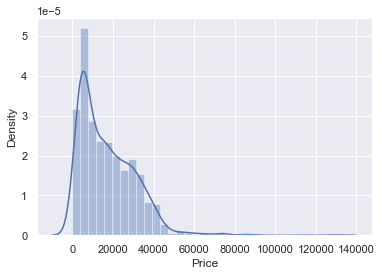

In [12]:
sns.distplot(data_no_mv['Price'])

In [13]:
q= data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1111.000000,1111.000000,1111,1111.000000,1111
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,210,NaN,282
mean,16501.235824,2010.429343,NaN,107069.387039,NaN
std,12118.562619,8.062269,NaN,78977.767851,NaN
min,0.000000,1911.000000,NaN,0.000000,NaN
25%,5460.000000,2007.000000,NaN,47724.000000,NaN
50%,14498.000000,2012.000000,NaN,99501.000000,NaN
75%,25545.000000,2015.000000,NaN,156130.000000,NaN


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

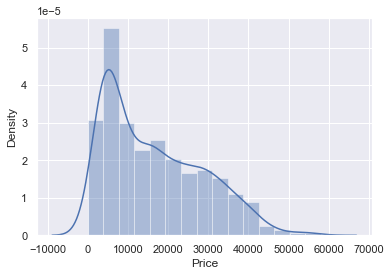

In [14]:
sns.distplot(data_1['Price'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

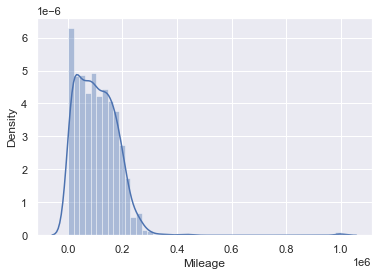

In [15]:
sns.distplot(data_no_mv['Mileage'])

In [16]:
q= data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1098.000000,1098.000000,1098,1098.000000,1098
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,207,NaN,279
mean,16640.781421,2010.576503,NaN,103265.137523,NaN
std,12113.746702,7.779087,NaN,65862.563176,NaN
min,0.000000,1911.000000,NaN,0.000000,NaN
25%,5637.500000,2007.000000,NaN,47223.750000,NaN
50%,14500.000000,2012.000000,NaN,98594.500000,NaN
75%,25937.500000,2016.000000,NaN,153904.000000,NaN


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

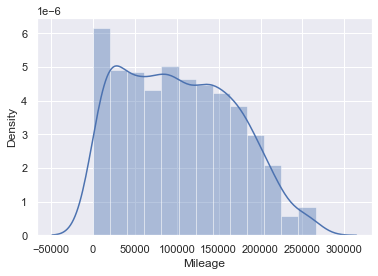

In [17]:
sns.distplot(data_2['Mileage'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

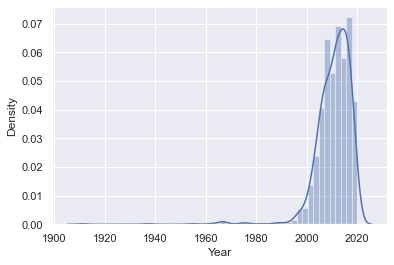

In [18]:
sns.distplot(data_2['Year'])

In [19]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

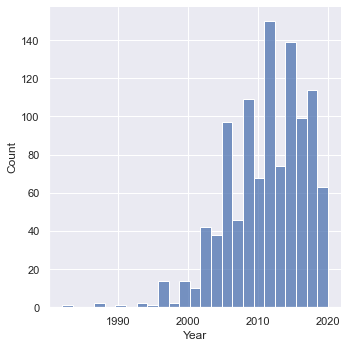

In [20]:
sns.displot(data_3['Year'])

In [21]:
data_3.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1086.000000,1086.000000,1086,1086.000000,1086
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,204,NaN,278
mean,16576.453039,2011.130755,NaN,103860.294659,NaN
std,12057.398410,5.427310,NaN,65690.377891,NaN
min,0.000000,1982.000000,NaN,0.000000,NaN
25%,5637.500000,2008.000000,NaN,47756.750000,NaN
50%,14499.000000,2012.000000,NaN,99123.000000,NaN
75%,25567.500000,2016.000000,NaN,154260.250000,NaN


In [22]:
data_3.dtypes

Price        int64
Year       float64
Brand       object
Mileage    float64
Type        object
dtype: object

In [23]:
data_3 = data_3.astype({'Price': float, 'Year': int, 'Mileage': int})

In [24]:
data_3.dtypes

Price      float64
Year         int32
Brand       object
Mileage      int32
Type        object
dtype: object

In [25]:
data_3

,Price,Year,Brand,Mileage,Type
0,35990.0,2010,chevrolet,32742,other
1,7500.0,2014,hyundai,93600,sedan
2,4900.0,2006,bmw,87046,SUV
4,19500.0,2005,ford,116000,pickup
5,29590.0,2016,toyota,33290,pickup
...,...,...,...,...,...
1994,23990.0,2013,lincoln,73242,SUV
1995,33688.0,2017,jeep,27955,SUV
1996,39888.0,2016,chevrolet,22333,pickup
1997,42888.0,2019,chevrolet,31486,pickup


In [26]:
data_3.drop(data_3[data_3.Price == 0].index, inplace=True)

In [27]:
data_3.drop(data_3[data_3.Mileage == 0].index, inplace=True)

In [28]:
data_3.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1070.000000,1070.000000,1070,1070.000000,1070
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,199,NaN,273
mean,16795.867290,2011.143925,NaN,104977.922430,NaN
std,12005.653267,5.423663,NaN,65209.357267,NaN
min,490.000000,1982.000000,NaN,154.000000,NaN
25%,5970.000000,2008.000000,NaN,49957.250000,NaN
50%,14590.000000,2012.000000,NaN,99812.000000,NaN
75%,25980.000000,2016.000000,NaN,154745.250000,NaN


In [29]:
data_cleaned = data_3.reset_index(drop=True)

In [30]:
data_cleaned.describe(include='all')

,Price,Year,Brand,Mileage,Type
count,1070.000000,1070.000000,1070,1070.000000,1070
unique,NaN,NaN,35,NaN,12
top,NaN,NaN,ford,NaN,sedan
freq,NaN,NaN,199,NaN,273
mean,16795.867290,2011.143925,NaN,104977.922430,NaN
std,12005.653267,5.423663,NaN,65209.357267,NaN
min,490.000000,1982.000000,NaN,154.000000,NaN
25%,5970.000000,2008.000000,NaN,49957.250000,NaN
50%,14590.000000,2012.000000,NaN,99812.000000,NaN
75%,25980.000000,2016.000000,NaN,154745.250000,NaN


In [31]:
data_cleaned.to_csv('Vehicle_Data_Cleaned.csv', index=False)

### Checking the OLS assumption

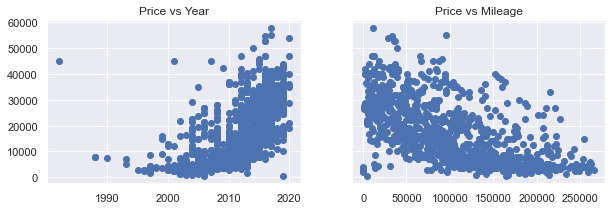

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(10,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price vs Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price vs Mileage')
plt.show()

### Relaxing the Assumptions

In [33]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Price,Year,Brand,Mileage,Type,log_price
0,35990.0,2010,chevrolet,32742,other,10.490996
1,7500.0,2014,hyundai,93600,sedan,8.922658
2,4900.0,2006,bmw,87046,SUV,8.496990
3,19500.0,2005,ford,116000,pickup,9.878170
4,29590.0,2016,toyota,33290,pickup,10.295192
...,...,...,...,...,...,...
1065,23990.0,2013,lincoln,73242,SUV,10.085392
1066,33688.0,2017,jeep,27955,SUV,10.424897
1067,39888.0,2016,chevrolet,22333,pickup,10.593831
1068,42888.0,2019,chevrolet,31486,pickup,10.666347


In [34]:
log_price.dtypes

dtype('float64')

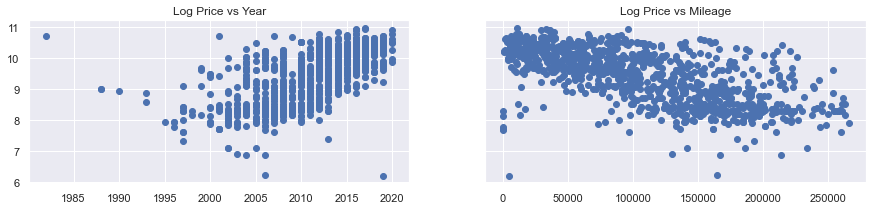

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price vs Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Log Price vs Mileage')
plt.show()

In [36]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [37]:
#some checks: 1. No endogeneity - no interest (correlation)
#2. normality - assumed for big sample 
#3. zero mean - accomplished through inclusion of intercept
#4  homoscedastic - generally holds as like in the graph.
#5 no autocorrelation - the data/observations are not coming from the time or panel data.

### Checking for Multicollinearity

In [38]:
data_cleaned.columns.values

array(['Year', 'Brand', 'Mileage', 'Type', 'log_price'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] =variables.columns

In [40]:
vif

,VIF,features
0,-0.000131,Mileage
1,0.027177,Year


In [41]:
data_no_multicollinearity = data_cleaned

### Create Dummy Variables

In [42]:
data_with_dummies =pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [43]:
data_with_dummies.head()

,Year,Mileage,log_price,Brand_audi,Brand_bmw,Brand_buick,Brand_cadillac,Brand_chevrolet,Brand_chrysler,Brand_datsun,...,Type_coupe,Type_hatchback,Type_mini-van,Type_offroad,Type_other,Type_pickup,Type_sedan,Type_truck,Type_van,Type_wagon
0,2010,32742,10.490996,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2014,93600,8.922658,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2006,87046,8.496990,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2005,116000,9.878170,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016,33290,10.295192,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Rearranging the columns so the dependent variable is the first one in the dataframe.

In [44]:
data_with_dummies.columns.values

array(['Year', 'Mileage', 'log_price', 'Brand_audi', 'Brand_bmw',
       'Brand_buick', 'Brand_cadillac', 'Brand_chevrolet',
       'Brand_chrysler', 'Brand_datsun', 'Brand_dodge', 'Brand_fiat',
       'Brand_ford', 'Brand_gmc', 'Brand_honda', 'Brand_hyundai',
       'Brand_infiniti', 'Brand_jeep', 'Brand_kia', 'Brand_lexus',
       'Brand_lincoln', 'Brand_mazda', 'Brand_mercedes-benz',
       'Brand_mercury', 'Brand_mini', 'Brand_mitsubishi', 'Brand_nissan',
       'Brand_pontiac', 'Brand_porsche', 'Brand_ram', 'Brand_rover',
       'Brand_saturn', 'Brand_subaru', 'Brand_tesla', 'Brand_toyota',
       'Brand_volkswagen', 'Brand_volvo', 'Type_convertible',
       'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad',
       'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck',
       'Type_van', 'Type_wagon'], dtype=object)

In [45]:
cols = ['log_price','Year', 'Mileage', 'Brand_audi', 'Brand_bmw',
       'Brand_buick', 'Brand_cadillac', 'Brand_chevrolet',
       'Brand_chrysler', 'Brand_dodge', 'Brand_fiat', 'Brand_ford',
       'Brand_gmc', 'Brand_honda', 'Brand_hyundai', 'Brand_infiniti',
       'Brand_jeep', 'Brand_kia', 'Brand_lexus', 'Brand_lincoln',
       'Brand_mazda', 'Brand_mercedes-benz', 'Brand_mercury',
       'Brand_mini', 'Brand_mitsubishi', 'Brand_nissan', 'Brand_pontiac',
       'Brand_ram', 'Brand_rover', 'Brand_saturn', 'Brand_subaru',
       'Brand_tesla', 'Brand_toyota', 'Brand_volkswagen', 'Brand_volvo',
       'Type_convertible', 'Type_coupe', 'Type_hatchback',
       'Type_mini-van', 'Type_offroad', 'Type_pickup', 'Type_sedan',
       'Type_truck', 'Type_van', 'Type_wagon']

In [46]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Year,Mileage,Brand_audi,Brand_bmw,Brand_buick,Brand_cadillac,Brand_chevrolet,Brand_chrysler,Brand_dodge,...,Type_convertible,Type_coupe,Type_hatchback,Type_mini-van,Type_offroad,Type_pickup,Type_sedan,Type_truck,Type_van,Type_wagon
0,10.490996,2010,32742,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.922658,2014,93600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8.496990,2006,87046,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.878170,2005,116000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10.295192,2016,33290,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Standardizing the data and creating the Linear Regression Model

#### Declaring the inputs and targets

In [47]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

#### Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [49]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)


#### Creating the regression

In [52]:
reg = LinearRegression()

In [53]:
reg.fit(x_train, y_train)

LinearRegression()

In [54]:
y_hat = reg.predict(x_train)

### Scatter Plot

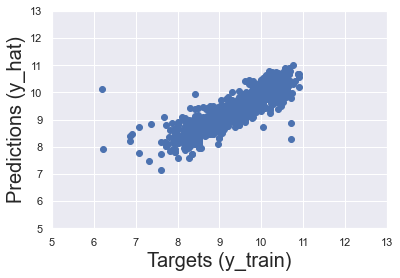

In [55]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=20)
plt.ylabel('Predictions (y_hat)', size=20)
plt.xlim(5,13)
plt.ylim(5,13)
plt.show()

### Residual Plot
Residual = differences between the targets and the predictions

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

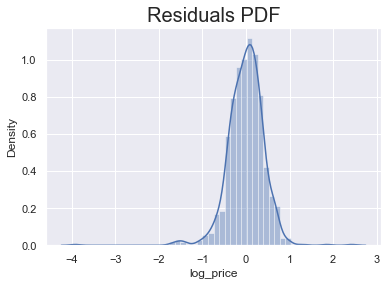

In [56]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=20)

In [57]:
reg.score(x_train, y_train)

0.77187264473187

In [58]:
reg.intercept_

9.418831390641508

In [59]:
reg.coef_

array([ 0.31484718, -0.30970564, -0.03981173, -0.08619745, -0.12026882,
       -0.06535247, -0.21085144, -0.08733222, -0.15533483, -0.05396114,
       -0.30569781, -0.11403064, -0.18305885, -0.17729239, -0.05379396,
       -0.12342202, -0.12388857, -0.04825091, -0.05240076, -0.14774063,
       -0.06557133, -0.05624307, -0.07459709, -0.03221158, -0.24160182,
       -0.09284724, -0.11904211, -0.02385625, -0.04516517, -0.03793627,
        0.01724907, -0.19065724, -0.10363029, -0.03279204,  0.01154547,
       -0.00252302, -0.06370913, -0.02348128,  0.0030224 ,  0.10743136,
       -0.20315378,  0.18714884, -0.0386543 , -0.04817497])

In [60]:
reg_summary= pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year,0.314847
1,Mileage,-0.309706
2,Brand_audi,-0.039812
3,Brand_bmw,-0.086197
4,Brand_buick,-0.120269
5,Brand_cadillac,-0.065352
6,Brand_chevrolet,-0.210851
7,Brand_chrysler,-0.087332
8,Brand_dodge,-0.155335
9,Brand_fiat,-0.053961


### Testing

In [61]:
y_hat_test = reg.predict(x_test)

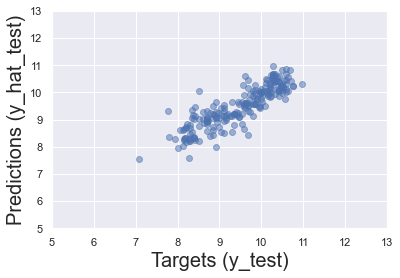

In [62]:
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (y_test)', size=20)
plt.ylabel('Predictions (y_hat_test)', size=20)
plt.xlim(5,13)
plt.ylim(5,13)
plt.show()

In [63]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7731.555963
1,7816.992622
2,30095.412156
3,3701.347756
4,24121.673590


In [64]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7731.555963,NaN
1,7816.992622,NaN
2,30095.412156,NaN
3,3701.347756,NaN
4,24121.673590,NaN
...,...,...
209,28172.342163,8480.0
210,35530.764700,NaN
211,17162.146635,NaN
212,17375.798097,9900.0


In [65]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7731.555963,NaN
1,7816.992622,NaN
2,30095.412156,NaN
3,3701.347756,NaN
4,24121.673590,NaN
...,...,...
209,28172.342163,8480.0
210,35530.764700,NaN
211,17162.146635,NaN
212,17375.798097,9900.0


In [66]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [67]:
df_pf['Difference %'] = np.absolute(df_pf['Residual'] / df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference %
0,7731.555963,NaN,NaN,NaN
1,7816.992622,NaN,NaN,NaN
2,30095.412156,NaN,NaN,NaN
3,3701.347756,NaN,NaN,NaN
4,24121.673590,NaN,NaN,NaN
...,...,...,...,...
209,28172.342163,8480.0,-19692.342163,232.221016
210,35530.764700,NaN,NaN,NaN
211,17162.146635,NaN,NaN,NaN
212,17375.798097,9900.0,-7475.798097,75.513112


In [68]:
df_pf.describe()

,Prediction,Target,Residual,Difference %
count,214.000000,44.000000,44.000000,44.000000
mean,17366.190287,15631.431818,531.307772,145.499847
std,12019.173122,11718.807347,16164.571754,269.679547
min,1929.365132,2350.000000,-40068.373624,8.596779
25%,8162.762684,7387.500000,-7485.465361,30.106164
50%,13788.757471,9700.000000,250.247836,62.354410
75%,24824.484641,23600.000000,9888.963929,93.343454
max,58826.596815,41990.000000,39109.414331,1431.013344


In [69]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference %'])

,Prediction,Target,Residual,Difference %
171,21479.76,23500.00,2020.24,8.60
76,21068.32,23900.00,2831.68,11.85
49,10089.29,8998.00,-1091.29,12.13
67,9683.45,8500.00,-1183.45,13.92
153,10928.45,9500.00,-1428.45,15.04
61,10560.51,8998.00,-1562.51,17.37
73,4048.23,3400.00,-648.23,19.07
145,21548.49,27990.00,6441.51,23.01
124,3801.28,4950.00,1148.72,23.21
175,27151.44,21990.00,-5161.44,23.47


In [70]:
reg.score(x_test, y_test)

0.7517002654123224